In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Barents = pd.read_excel(filepath, sheet_name='Barents-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Barents)
fp.date_time(Barents)

,Extent,Date
0,1107873.946,1979-01-01
1,1211101.473,1979-02-01
2,1215128.770,1979-03-01
3,1233940.811,1979-04-01
4,1193061.566,1979-05-01
...,...,...
533,124025.343,2023-06-01
534,53107.426,2023-07-01
535,11242.827,2023-08-01
536,3272.024,2023-09-01


In [5]:
scaler = MinMaxScaler()
Barents['Extent'] = scaler.fit_transform(Barents['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 5
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Barents['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((522, 12, 1), (522,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Barents_model_LT5/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
43/53 [=======================>......] - ETA: 0s - loss: 0.1647 - root_mean_squared_error: 0.4059

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 8s 96ms/step - loss: 0.1581 - root_mean_squared_error: 0.3976 - val_loss: 0.0501 - val_root_mean_squared_error: 0.2238
Epoch 2/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1299 - root_mean_squared_error: 0.3604

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 5s 98ms/step - loss: 0.1247 - root_mean_squared_error: 0.3531 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2010
Epoch 3/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1037 - root_mean_squared_error: 0.3220

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.1011 - root_mean_squared_error: 0.3180 - val_loss: 0.0334 - val_root_mean_squared_error: 0.1827
Epoch 4/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0812 - root_mean_squared_error: 0.2850

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 5s 101ms/step - loss: 0.0808 - root_mean_squared_error: 0.2843 - val_loss: 0.0290 - val_root_mean_squared_error: 0.1703
Epoch 5/50
53/53 [==============================] - ETA: 0s - loss: 0.0601 - root_mean_squared_error: 0.2452

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.0601 - root_mean_squared_error: 0.2452 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1627
Epoch 6/50
53/53 [==============================] - ETA: 0s - loss: 0.0508 - root_mean_squared_error: 0.2253

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0508 - root_mean_squared_error: 0.2253 - val_loss: 0.0255 - val_root_mean_squared_error: 0.1598
Epoch 7/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0392 - root_mean_squared_error: 0.1981

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 5s 104ms/step - loss: 0.0387 - root_mean_squared_error: 0.1967 - val_loss: 0.0239 - val_root_mean_squared_error: 0.1547
Epoch 8/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0363 - root_mean_squared_error: 0.1905

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0362 - root_mean_squared_error: 0.1903 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1527
Epoch 9/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0272 - root_mean_squared_error: 0.1650

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 5s 105ms/step - loss: 0.0274 - root_mean_squared_error: 0.1654 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1479
Epoch 10/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0225 - root_mean_squared_error: 0.1499

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 5s 98ms/step - loss: 0.0231 - root_mean_squared_error: 0.1519 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1420
Epoch 11/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0244 - root_mean_squared_error: 0.1563

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0242 - root_mean_squared_error: 0.1556 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1340
Epoch 12/50
53/53 [==============================] - ETA: 0s - loss: 0.0213 - root_mean_squared_error: 0.1459

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0213 - root_mean_squared_error: 0.1459 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1320
Epoch 13/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0179 - root_mean_squared_error: 0.1339

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.0178 - root_mean_squared_error: 0.1335 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1140
Epoch 14/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0166 - root_mean_squared_error: 0.1289 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1160
Epoch 15/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0187 - root_mean_squared_error: 0.1369

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 6s 107ms/step - loss: 0.0191 - root_mean_squared_error: 0.1380 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1130
Epoch 16/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0195 - root_mean_squared_error: 0.1395

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 6s 110ms/step - loss: 0.0194 - root_mean_squared_error: 0.1393 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1039
Epoch 17/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0168 - root_mean_squared_error: 0.1297 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1113
Epoch 18/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0172 - root_mean_squared_error: 0.1313 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1139
Epoch 19/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0200 - root_mean_squared_error: 0.1414 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1105
Epoch 20/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0155 - root_mean_squared_error: 0.1244 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1204
Epoch 21/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0177 - root_mean_squared_error: 0.1331

INFO:tensorflow:Assets written to: Barents_model_LT5\assets


INFO:tensorflow:Assets written to: Barents_model_LT5\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0175 - root_mean_squared_error: 0.1324 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1001
Epoch 22/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0170 - root_mean_squared_error: 0.1302 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1235
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0182 - root_mean_squared_error: 0.1350 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1399
Epoch 24/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0220 - root_mean_squared_error: 0.1483 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1093
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1070
Epoch 26/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0156 - root_mean_squared_error: 0.1247 - val_loss: 0.0165 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.6411147753397624 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

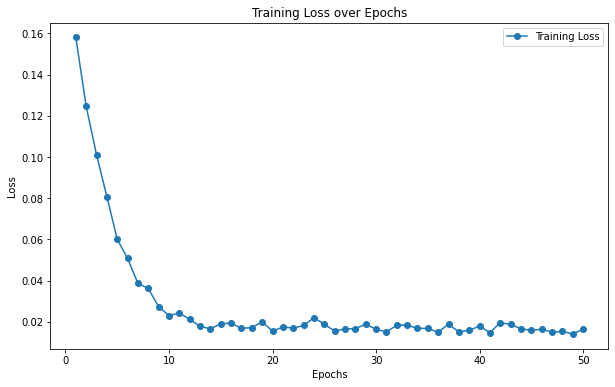

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

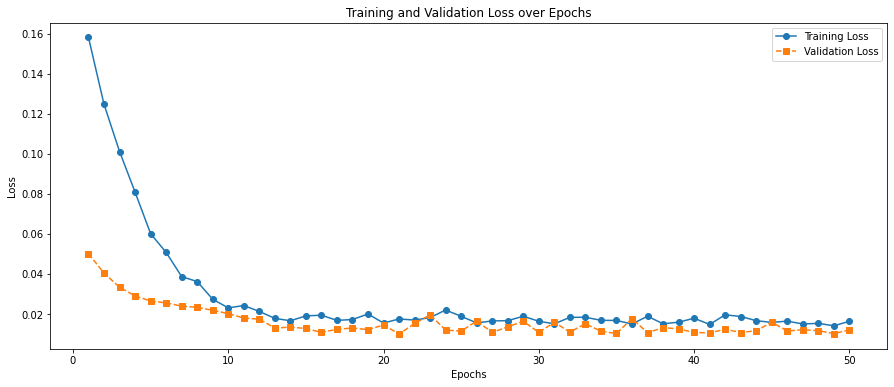

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Barents_model_LT5/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.08963157712482923
MAE : 0.07471230483975755


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,-91669.929688,14909.156
1,35676.179688,54595.378
2,122473.890625,242829.930
3,259214.406250,406860.687
4,380575.656250,605897.837
5,463139.281250,654073.790
6,564362.062500,701143.910
7,573250.562500,657891.340
8,447437.125000,432215.421
9,285574.406250,201834.787


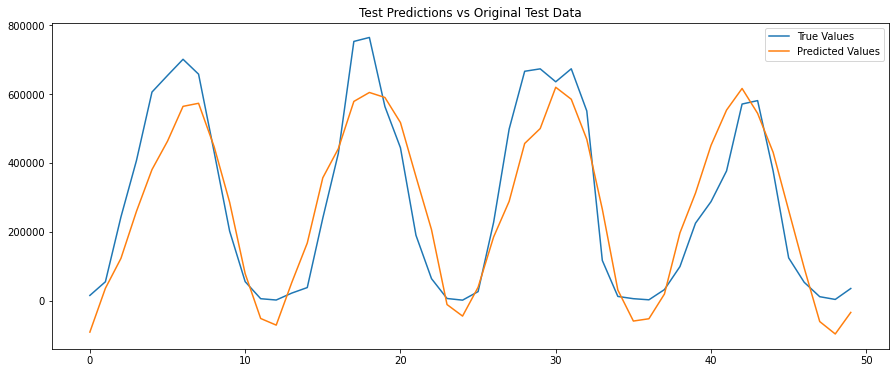

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

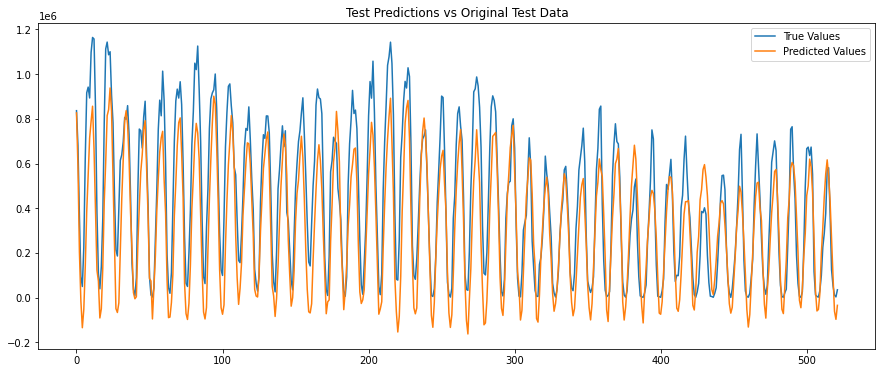

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()